# Chapter09 가설검정

- <a href="#9.1통계적가설검정">9.1 통계적 가설검정</a>
- <a href="#9.2모평균의검정">9.2 모평균의 검정($𝜎^2$:기지)</a>
- <a href="#9.3모평균의검정">9.3 모평균의 검정($𝜎^2$:미지)</a>
- <a href="#9.4모비율의검정">9.4 모비율의 검정</a>

In [1]:
# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (4,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

-----------------------------

## <a name="9.1통계적가설검정">9.1 통계적 가설검정</a>

### 가설검정의 의미

#### 유의확률
- 만약 우리가 최초에 가정한 귀무가설이 사실이라면 실제 데이터에서 구한 검정통계량의 값은 검정통계량 확률분포를 따르고 있으므로 기댓값이나 모드값 근처의 값이 나왔을 것이다. 
- 반대로 우리가 가정한 귀무가설이 사실이 아니라면 실제 데이터에서 구한 검정통계량의 값은 검정통계량에서 나오기 어려운 값이 나왔을 것이다

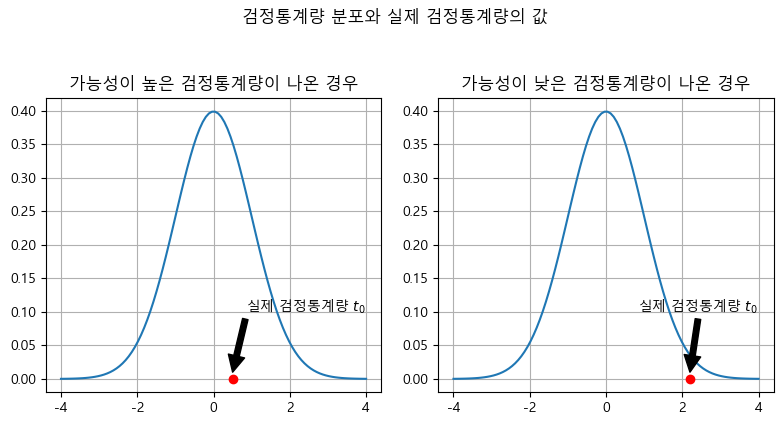

In [8]:
xx1 = np.linspace(-4, 4, 100) # -4~4 임의의 실수 100개

black = {"facecolor": "black"}
plt.figure(figsize=(8, 4))    # 그래프 크기

plt.subplot(121)
plt.title("가능성이 높은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))  #  x축:임의실수, y축: 정규분포 확률
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
plt.grid()

plt.subplot(122)
plt.title("가능성이 낮은 검정통계량이 나온 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
plt.grid()

plt.suptitle("검정통계량 분포와 실제 검정통계량의 값", y=1.05)
plt.tight_layout()
plt.show()

- 유의확률은 확률분포와 확률분포의 표본값 1개가 주어졌을 때 그 확률분포에서 해당 표본값 혹은 더 희귀한(rare) 값이 나올 수 있는 확률로 정의한다.
- 유의확률의 값은 확률밀도함수에서 표본값을 기준으로 만들어진 양측 꼬리(tail)부분에 해당하는 영역의 면적이다.
- 누적확률분포함수 F(x)를 사용하여 계산할 수 있다.
> 유의확률= $2min(P(t≤t0),P(t≥t0))$
         =$2min(F(t0),1−F(t0))$



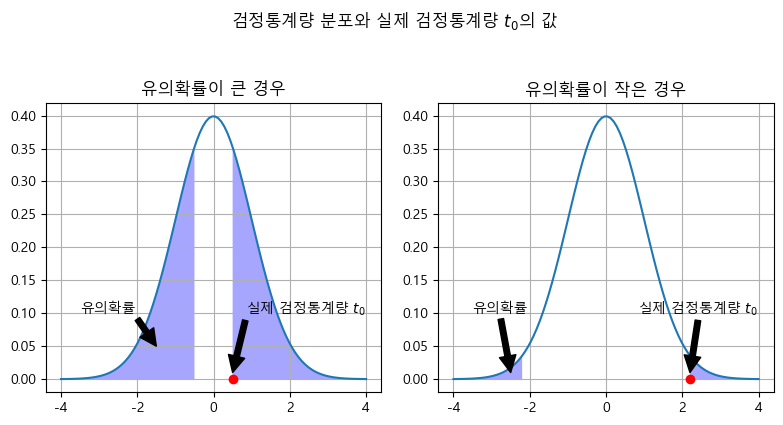

In [7]:
plt.figure(figsize=(8, 4))  

plt.subplot(121)
plt.title("유의확률이 큰 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(0.5, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(0.5, 0.01), xytext=(0.85, 0.1), arrowprops=black)
plt.grid()
xx2 = np.linspace(-4, -0.5, 100)
xx3 = np.linspace(0.5, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-1.5, 0.05), xytext=(-3.5, 0.1), arrowprops=black)


plt.subplot(122)
plt.title("유의확률이 작은 경우")
plt.plot(xx1, sp.stats.norm.pdf(xx1))
plt.plot(2.2, 0, "ro")
plt.annotate('실제 검정통계량 $t_0$', xy=(2.2, 0.01), xytext=(0.85, 0.1), arrowprops=black)
xx2 = np.linspace(-4, -2.2, 100)
xx3 = np.linspace(2.2, 4, 100)
plt.fill_between(xx2, sp.stats.norm.pdf(xx2), facecolor='blue', alpha=0.35)
plt.fill_between(xx3, sp.stats.norm.pdf(xx3), facecolor='blue', alpha=0.35)
plt.annotate('유의확률', xy=(-2.5, 0.01), xytext=(-3.5, 0.1), arrowprops=black)
plt.grid()

plt.suptitle("검정통계량 분포와 실제 검정통계량 $t_0$의 값", y=1.05)
plt.tight_layout()
plt.show()

### [실습] 신뢰구간과 가설검정의 관계

- (a) 모평균에 대한 95% 신뢰구간 구하기

In [48]:
# 모분산이 알려진 정규모집단의 신뢰구간
Z = {90:1.645, 95:1.96, 99:2.58}   # 중심확률분포

n, x_, var = 25, 7, 4   # 표본개수, 표본평균, 분산
print(f'n, x_, var : {n, x_, var}')

a = x_ - Z[95] * (np.sqrt(var)/np.sqrt(n)) 
b = x_ + Z[95] * (np.sqrt(var)/np.sqrt(n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

n, x_, var : (25, 7, 4)
모평균의 신뢰구간 : 6.216 <= mu <= 7.784


- (b) 유의수준 5%에서 $H_0 : \mu = 6.3$

In [5]:
mu = 6.3
if a < mu < b:
    print(f'귀무가설: mu = {mu}는 채택한다.')
else:
    print(f'귀무가설: mu = {mu}는 기각한다.')

귀무가설: mu = 6.3는 채택한다.


- (c) 유의수준 5%에서 $H_0 : \mu = 6.1$

In [6]:
mu = 6.1
if a < mu < b:
    print(f'귀무가설: mu = {mu}는 채택한다.')
else:
    print(f'귀무가설: mu = {mu}는 기각한다.')

귀무가설: mu = 6.1는 기각한다.


------------------------------------------------------

## <a name="9.2모평균의검정">9.2 모평균의 검정($𝜎^2$:기지)</a>

### 모평균에 대한 양측검정

### [실습] 예제 9-1

- (a) 귀무가설과 대립가설 설정하기
- $H_0 : \mu = 10$, $H_1 : \mu \neq 10$ 

In [8]:
# 모분산이 알려진 정규모집단의 신뢰구간
import numpy as np
Z = {90:1.645, 95:1.96, 99:2.58}   # 양측검정용
man = [3,4,12,16,5,11,21,9,8,25,17,3,8,6,13,7,30,12,9,10]
woman = [12,5,4,10,1,8,19,13,9,16,13,13,7,9,15,8,28]

alpha = 0.05  # 유의수준 
n, m, x1_, x2_, v1, v2 = 20, 17, np.mean(man), np.mean(woman), np.power(5.6,2), np.power(4.5,2)   # 표본개수, 표본평균, 분산

print(round(x1_ - x2_, 4))

a = (x1_ - x2_) - Z[100*(1-alpha)] * (np.sqrt(v1/n + v2/m)) 
b = (x1_ - x2_) + Z[100*(1-alpha)] * (np.sqrt(v1/n + v2/m))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

0.2735
모평균의 신뢰구간 : -2.982181313931262 <= mu <= 3.5292401374606737


- (b) 유의수준 5%에서 기각역 구하기 : 양측검정

In [72]:
za, zb = Z[100*(1-alpha)]*-1, Z[100*(1-alpha)]
#양측검정
print(f'양측검정: Z <= {za} 또는 Z >= {zb}')

양측검정: Z <= -1.96 또는 Z >= 1.96


- (c) 검정통계량의 관찰값 구하기

In [4]:
z0 = (x1_ - x2_) /np.sqrt(v1/n + v2/m) 
print(f'검정통계량의 관찰값(z0) : {round(z0, 4)}')

검정통계량의 관찰값(z0) : 0.1647


- (d) 유의수준 5%에서 귀무가설 검정하기

In [74]:
# 유의수준에 의한 귀무가설 검정하기
if za < z0 < zb:
    print(f'유의수준 {alpha*100}%에서 귀무가설:(mu = {mu})을  채택한다.')
else:
    print(f'유의수준 {alpha*100}%에서 귀무가설:(mu = {mu})을 기각한다.')
    

유의수준 5.0%에서 귀무가설:(mu = 10)을 기각한다.


### [실습] 예제9-2: p-값 구하고 $H_0 : \mu = 10$ 가설 검정하기
- **단일표본 z검정(One-sample z-test)**은 분산 σ2의 값을 정확히 알고 있는 정규분포의 표본에 대해 기댓값을 조사하는 검정방법이다

In [77]:
n, x_, var = 36, 9.32, 4   # 표본개수, 표본평균(실제모수:x_=mu_0), 분산
np.random.seed(0)
x = sp.stats.norm(x_).rvs(n)
# print(f'x={x}')

# z검정
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x_ - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

# print( ztest_1samp(x, 4, mu) )
z0, pvalue = ztest_1samp(x, 4, 10) # z검정통계량, pvalue
print(f'z검정통계량 관찰값: {z0}, pvalue: {pvalue}' )
print()

# 유의수준에 의한 귀무가설 검정하기
if za < z0 < zb:
    print(f'유의수준 alpha={alpha*100}%에서 귀무가설:(mu = {mu})을  채택한다.')
else:
    print(f'유의수준 alpha={alpha*100}%에서 귀무가설:(mu = {mu})을 기각한다.')

    
# p-값에 의한 귀무가설 검정하기
if pvalue > alpha :
    print(f'p-값={pvalue} > alpha={alpha} 이므로 귀무가설:(mu = {mu})을 채택한다.')
else:
    print(f'p-값={pvalue} <= alpha={alpha} 이므로 귀무가설:(mu = {mu})을 기각한다.')
    

z검정통계량 관찰값: -2.039999999999999, pvalue: 0.04135032573214017

유의수준 alpha=5.0%에서 귀무가설:(mu = 10)을 기각한다.
p-값=0.04135032573214017 <= alpha=0.05 이므로 귀무가설:(mu = 10)을 기각한다.


### [실습] 예제 9-3, 9-4 : 상단측검정

In [78]:
Z = {90:1.282, 95:1.645, 99:2.326}   # 한쪽검정용

alpha = 0.01  # 유의수준
mu = 10       # 모평균
n, x_, var = 36, 10.9, 4   # 표본개수, 표본평균(실제모수:x_=mu_0), 분산
# print(f'n, x_, var : {n, x_, var}')

a = x_ - Z[100*(1-alpha)] * (np.sqrt(var)/np.sqrt(n)) 
b = x_ + Z[100*(1-alpha)] * (np.sqrt(var)/np.sqrt(n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

모평균의 신뢰구간 : 10.124666666666666 <= mu <= 11.675333333333334


In [84]:
Z = {90:1.282, 95:1.645, 99:2.326}   # 한쪽검정용

alpha = 0.01  # 유의수준
mu = 10       # 모평균
n, x_, var = 36, 10.9, 4   # 표본개수, 표본평균(실제모수:x_=mu_0), 분산
np.random.seed(0)
x = sp.stats.norm(x_).rvs(n)
# print(f'x={x}')

za, zb = Z[100*(1-alpha)]*-1, Z[100*(1-alpha)]
#상단측검정
print(f'상단측검정: Z >= {zb}')


# z검정
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x_ - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

# print( ztest_1samp(x, 4, mu) )
z0, pvalue = ztest_1samp(x, 4, 10) # z검정통계량, pvalue
pvalue = pvalue/2
print(f'z검정통계량 관찰값: {z0}, pvalue: {pvalue}' )
print()


# 유의수준에 의한 귀무가설 검정하기
if z0 < zb:
    print(f'z0({z0}<{zb})이므로 유의수준 alpha={alpha*100}%에서 귀무가설:(mu <= {mu})을  채택한다.')
else:
    print(f'z0({z0}>={zb})이므로 유의수준 alpha={alpha*100}%에서 귀무가설:(mu <= {mu})을 기각한다.')

    
# p-값에 의한 귀무가설 검정하기
if pvalue > alpha :
    print(f'p-값={pvalue} > alpha={alpha} 이므로 귀무가설:(mu <= {mu})을 채택한다.')
else:
    print(f'p-값={pvalue} <= alpha={alpha} 이므로 귀무가설:(mu <= {mu})을 기각한다.')
    

상단측검정: Z >= 2.326
z검정통계량 관찰값: 2.700000000000001, pvalue: 0.0034669738030406547

z0(2.700000000000001>=2.326)이므로 유의수준 alpha=1.0%에서 귀무가설:(mu <= 10)을 기각한다.
p-값=0.0034669738030406547 <= alpha=0.01 이므로 귀무가설:(mu <= 10)을 기각한다.


### [실습] 예제 9-5, 9-6: 하단측검정

In [81]:
Z = {90:1.282, 95:1.645, 99:2.326}   # 한쪽검정용

alpha = 0.01  # 유의수준
mu = 10       # 모평균
n, x_, var = 36, 9.2, 4   # 표본개수, 표본평균(실제모수:x_=mu_0), 분산
# print(f'n, x_, var : {n, x_, var}')

a = x_ - Z[100*(1-alpha)] * (np.sqrt(var)/np.sqrt(n)) 
b = x_ + Z[100*(1-alpha)] * (np.sqrt(var)/np.sqrt(n))
print(f'모평균의 신뢰구간 : {a} <= mu <= {b}')

모평균의 신뢰구간 : 8.424666666666665 <= mu <= 9.975333333333333


In [85]:
Z = {90:1.282, 95:1.645, 99:2.326}   # 한쪽검정용

alpha = 0.01  # 유의수준
mu = 10       # 모평균
n, x_, var = 36, 9.2, 4   # 표본개수, 표본평균(실제모수:x_=mu_0), 분산
np.random.seed(0)
x = sp.stats.norm(x_).rvs(n)
# print(f'x={x}')

za, zb = Z[100*(1-alpha)]*-1, Z[100*(1-alpha)]
#하단측검정
print(f'하단측검정: Z <= {za}')


# z검정
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x_ - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

# print( ztest_1samp(x, 4, mu) )
z0, pvalue = ztest_1samp(x, 4, 10) # z검정통계량, pvalue
pvalue = pvalue/2
print(f'z검정통계량 관찰값: {z0}, pvalue: {pvalue}' )
print()


# 유의수준에 의한 귀무가설 검정하기
if z0 > za:
    print(f'z0({z0}>{za})이므로 유의수준 alpha={alpha*100}%에서 귀무가설:(mu >= {mu})을  채택한다.')
else:
    print(f'z0({z0}<={za})이므로 유의수준 alpha={alpha*100}%에서 귀무가설:(mu >= {mu})을 기각한다.')

    
# p-값에 의한 귀무가설 검정하기
if pvalue > alpha :
    print(f'p-값={pvalue} > alpha={alpha} 이므로 귀무가설:(mu >= {mu})을 채택한다.')
else:
    print(f'p-값={pvalue} <= alpha={alpha} 이므로 귀무가설:(mu >= {mu})을 기각한다.')
    

하단측검정: Z <= -2.326
z검정통계량 관찰값: -2.400000000000002, pvalue: 0.008197535924596079

z0(-2.400000000000002<=-2.326)이므로 유의수준 alpha=1.0%에서 귀무가설:(mu >= 10)을 기각한다.
p-값=0.008197535924596079 <= alpha=0.01 이므로 귀무가설:(mu >= 10)을 기각한다.


### [실습] 예제 9-7 : 두 모평균 차에 대한 검정

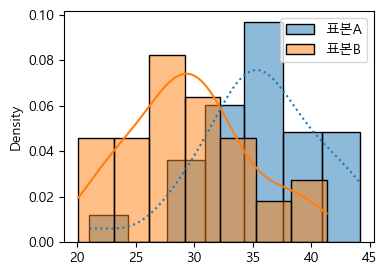

z검정통계량 관찰값: 1.8998364691148022, pvalue: 0.028727291695384755

p-값=0.028727291695384755 <= alpha=0.05 이므로 귀무가설:(두 모평균이 동일하다)을 기각한다.


In [111]:
import seaborn as sns

alpha = 0.05  # 유의수준
n1, x1_, sigma1 = 25, 33.3, 4.8   # 표본개수, 표본평균(실제모수:x_=mu_0), 모표준편차분산
n2, y1_, sigma2 = 36, 30.8, 5.4

np.random.seed(0)
A = sp.stats.norm(x1_, sigma1).rvs(n1)
B = sp.stats.norm(y1_, sigma2).rvs(n2)
# ax = sns.distplot(A, kde=False, fit=sp.stats.norm, label="표본A")
# ax = sns.distplot(B, kde=False, fit=sp.stats.norm, label="표본B")
ax = sns.histplot(A, kde=True, stat="density", label="표본A")
ax = sns.histplot(B, kde=True, stat="density", label="표본B")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()


def ztest_2samp(x1, y1, sigma1, sigma2, mu=0):
    z = ((x1-y1) - mu) / np.sqrt((sigma1**2/n1) + (sigma2**2/n2))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

z0, pvalue = ztest_2samp(x1_, y1_, sigma1, sigma2) # z검정통계량, pvalue
pvalue = pvalue/2
print(f'z검정통계량 관찰값: {z0}, pvalue: {pvalue}' )
print()

# p-값에 의한 귀무가설 검정하기
if pvalue > alpha :
    print(f'p-값={pvalue} > alpha={alpha} 이므로 귀무가설:(두 모평균이 동일하다)을 채택한다.')
else:
    print(f'p-값={pvalue} <= alpha={alpha} 이므로 귀무가설:(두 모평균이 동일하다)을 기각한다.')
    

--------

## <a name="9.3모평균의검정">9.3 모평균의 검정($𝜎^2$:미지)</a>

모분산이 알려져 있지 않은 경우에는 정규분포와 매우 흡사한 t-분포를 사용한다.
t-분포는 표본의 크기가 작은 경우, 즉, n < 30인 경우에 모평균 또는 모평균 차의 추론에 사용


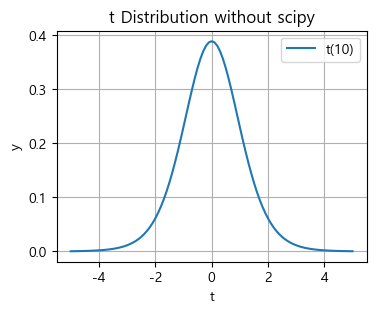

In [121]:
import numpy as np
import math

n = 10
x = np.linspace(-5, 5, 101)   # t 정의
y = (math.gamma((n+1) / 2) / (math.gamma(n / 2) * math.sqrt(math.pi * n))) * (1 + x ** 2 / n) ** (-(n + 1) / 2)

plt.plot(t, y)                       
plt.xlabel("t")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("t Distribution without scipy")     # 타이틀 표시
plt.legend(["t(10)"])                # 범례 표시
plt.show()

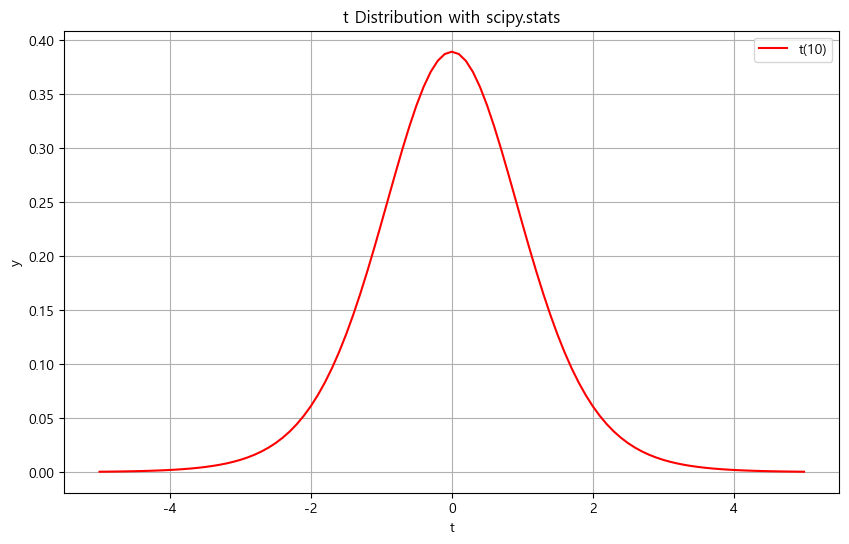

In [123]:
y1 = sp.stats.t(10).pdf(t)        

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(t, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
plt.xlabel("t")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("t Distribution with scipy.stats")     # 타이틀 표시
plt.legend(["t(10)"])                # 범례 표시
plt.show()    

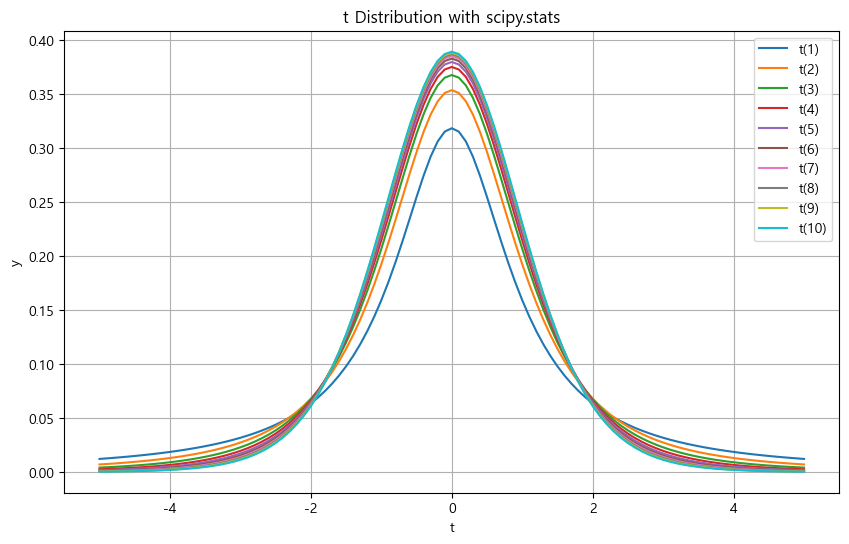

In [124]:
# 자유도가 클수록 정규분포와 흡사해진다.
legend = []

def t_dist(n) :
    legend.append("t(" + str(n) + ")")
    return stats.t(n).pdf(t)        

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정

for i in np.arange(10) + 1:
    plt.plot(t, t_dist(i))           # plot 추가       
    
plt.xlabel("t")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("t Distribution with scipy.stats")     # 타이틀 표시
plt.legend(legend)                   # 범례 표시
plt.show() 

### [실습] 예제 9-8 : 단일 모평균에 대한 검정(양측검정)

- (a) 귀무가설과 대립가설 설정하기
- $H_0 : \mu = 26.5$, $H_1 : \mu \neq 26.5$ 

- (b) 유의수준 5%에서 기각역 구하기 : 양측검정

In [130]:
# 모분산이 알려지지 않은 정규모집단의 신뢰구간(t-분포표)
alpha = 0.05  # 유의수준
mu = 26.5       # 모평균
n, x_, sigma = 16, 29, 4.8   # 표본개수, 표본평균, 표본표준편차
T = 2.131   # t-분포표 꼬리확률 확인
ta, tb = -T, T
#양측검정 기각역
print(f'양측검정 기각역: T <= {ta} 또는 T >= {tb}')

양측검정 기각역: T <= -2.131 또는 T >= 2.131


- (c) 검정통계량의 관찰값 구하기

In [141]:
t0 = (x_ - mu) / (sigma/np.sqrt(n)) 
print(f'검정통계량의 관찰값(t0) : {t0}')

검정통계량의 관찰값(t0) : 10.762488708214493


- (d) 유의수준 5%에서 귀무가설 검정하기

In [132]:
# 유의수준에 의한 귀무가설 검정하기
if ta < t0 < tb:
    print(f'유의수준 {alpha*100}%에서 귀무가설:(정규모집단 평균이 {mu}라는 주장)을  채택한다.')
else:
    print(f'유의수준 {alpha*100}%에서 귀무가설:(정규모집단 평균이 {mu}라는 주장)을 기각한다.')
    

유의수준 5.0%에서 귀무가설:(정규모집단 평균이 26.5라는 주장)을  채택한다.


-------

## <a name="9.4모비율의검정">9.4 모비율의 검정</a>

-----

끝